In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
# Configure the display settings of the plots
%matplotlib inline
sns.set(style='whitegrid')


In [25]:
# URL to download the Parkinson's dataset from UCI
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data_file = "parkinsons.data"

# Download dataset
download_dataset(data_url, data_file)

# Read the dataset
data = pd.read_csv(data_file)
print(data.head())

# General dataset statistics
print(data.describe())

print(data.info())

# Check for missing values
print(data.isnull().sum())


Dataset parkinsons.data already downloaded.
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status   

In [ ]:


# Address class imbalance with SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Resample and normalize data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Reduced Complexity Model with Regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_resampled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Retrain the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_resampled, y_resampled,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Check metrics again
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel accuracy on test data: {accuracy * 100:.2f}%")
print("\nClassification report:")


Epoch 1/100


c:\Users\karino\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7189 - loss: 1.3469 - val_accuracy: 0.1304 - val_loss: 1.5159
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6583 - loss: 1.3272 - val_accuracy: 0.4130 - val_loss: 1.4437
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6721 - loss: 1.2774 - val_accuracy: 0.5217 - val_loss: 1.3922
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7600 - loss: 1.2117 - val_accuracy: 0.5435 - val_loss: 1.3407
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7696 - loss: 1.1761 - val_accuracy: 0.5652 - val_loss: 1.2896
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7963 - loss: 1.1372 - val_accuracy: 0.5870 - val_loss: 1.2447
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7685 - loss: 1.0929 - val_accuracy: 0.6087 - val_loss: 1.2016
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7972 - loss: 1.0536 - val_accuracy: 0.6957 - val_loss: 1.1593
Epoc

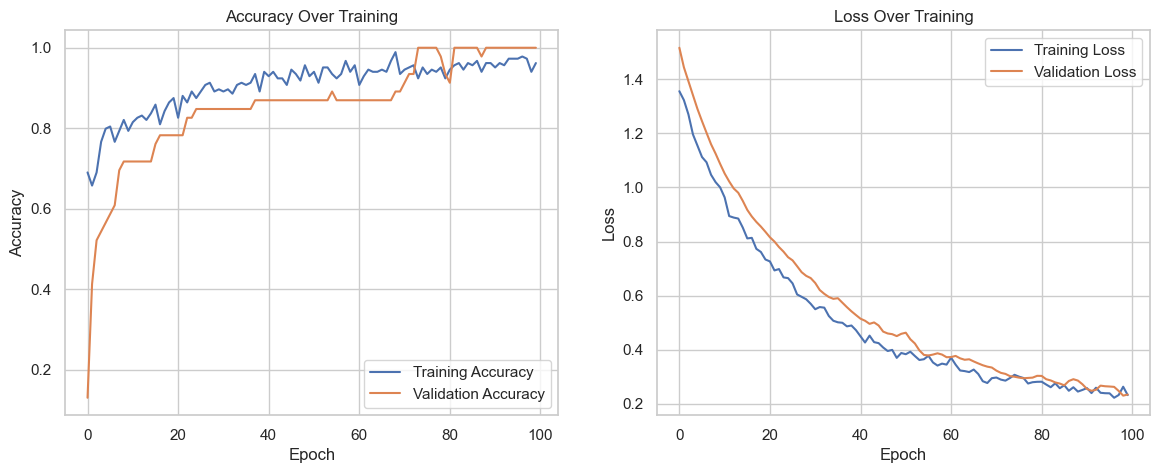

In [16]:
# Plot training and validation accuracy
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Model accuracy on test data: 89.74%

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39



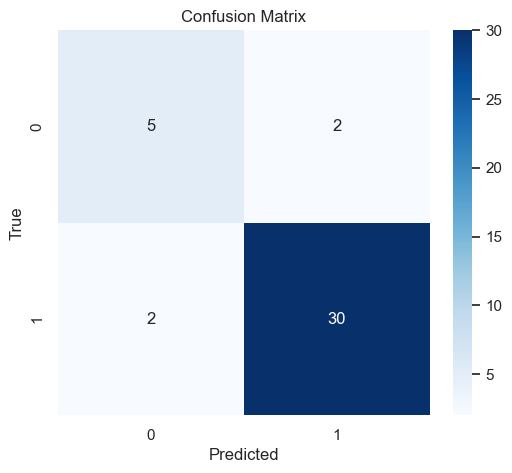

In [17]:
# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Compute the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel accuracy on test data: {accuracy * 100:.2f}%")

# Display the classification report
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
